# import libraries

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

# seed for reproducibility

In [309]:
np.random.seed(0)

# generate data

In [310]:
dogs_whisker_length= np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index= np.random.normal(loc=8,scale=1,size=10)

In [311]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [312]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

In [313]:
cats_whisker_length = np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index = np.random.normal(loc=5,scale=1,size=10)

In [314]:
cats_whisker_length

array([ 5.44701018,  8.6536186 ,  8.8644362 ,  7.25783498, 10.26975462,
        6.54563433,  8.04575852,  7.81281615,  9.53277921,  9.46935877])

In [315]:
cats_ear_flappiness_index

array([5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725])

# visualize data points

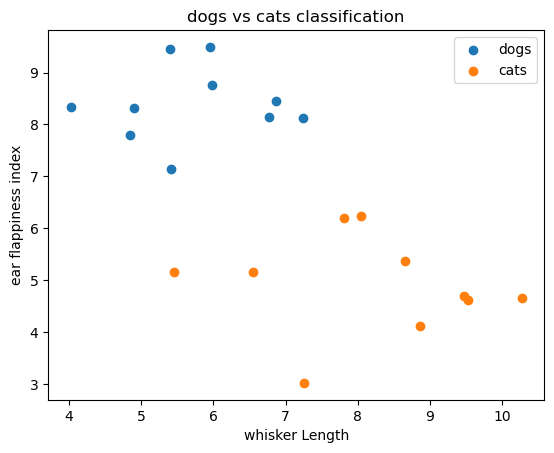

In [316]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label="dogs")
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label="cats")
plt.xlabel("whisker Length")
plt.ylabel("ear flappiness index")
plt.title("dogs vs cats classification")
plt.legend()
plt.show()

# intiliaze the algorithm

In [317]:
def random_linear_classifier(data_dogs,data_cats,k,d):
    best_error=float('inf')
    best_theta=None
    best_theta0=None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        error = compute_error(data_dogs,data_cats,theta,theta0)
        
        if  error< best_error:
            best_error= error
            best_theta0 = theta0
            best_theta = theta

    return best_theta, best_theta0, best_error


# compute error

In [318]:
def compute_error(data_dogs,data_cats,theta,theta0):
    error =0

    for x_dog in data_dogs:
        if np.dot(theta,x_dog)+theta0 <= 0 :
            error+=1
        
    for x_cat in data_cats:
        if np.dot(theta,x_cat)+theta0 > 0 :
            error +=1

    return error

# CVE Cross Validation Error

In [287]:
# define function for k-fold cross-validation
def cross_validate(data_dogs,data_cats,k_values,d,n_splits=5):
    kf= KFold(n_splits=n_splits,shuffle=True,random_state=42)
    avg_errors = []

    for k in k_values:
        errors=[]
        
        for train_index, val_index in kf.split(data_dogs):
            X_train_fold= np.vstack((data_dogs[train_index],data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)),np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index],data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)),np.ones(len(val_index)))) 

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(X_train_fold[y_train_fold==0],X_train_fold[y_train_fold==1],k,d)

            errors.append(compute_error(X_val_fold[y_val_fold==0],X_val_fold[y_val_fold==1],best_theta_fold,best_theta0_fold))

        avg_errors.append(np.mean(errors))
    best_k = k_values[np.argmin(avg_errors)]
    return best_k


#define k values try
k_values= [1,10,50,100,200,350]

best_k=cross_validate(dogs_data,cats_data,k_values,d=2)
print(f"Best value of k: {best_k}")

Best value of k: 350


# Combine data

In [319]:
dogs_data = np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T

data = np.vstack((dogs_data,cats_data))
labels = np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))

In [320]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [321]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [322]:
data

array([[ 6.76405235,  8.14404357],
       [ 5.40015721,  9.45427351],
       [ 5.97873798,  8.76103773],
       [ 7.2408932 ,  8.12167502],
       [ 6.86755799,  8.44386323],
       [ 4.02272212,  8.33367433],
       [ 5.95008842,  9.49407907],
       [ 4.84864279,  7.79484174],
       [ 4.89678115,  8.3130677 ],
       [ 5.4105985 ,  7.14590426],
       [ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [323]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

# Split data into training and testing sets

In [324]:
X_train,X_test,Y_train,Y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [325]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

In [326]:
Y_test

array([0., 1., 1., 0.])

In [327]:
X_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

In [328]:
Y_train

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.])

# visualize the data 

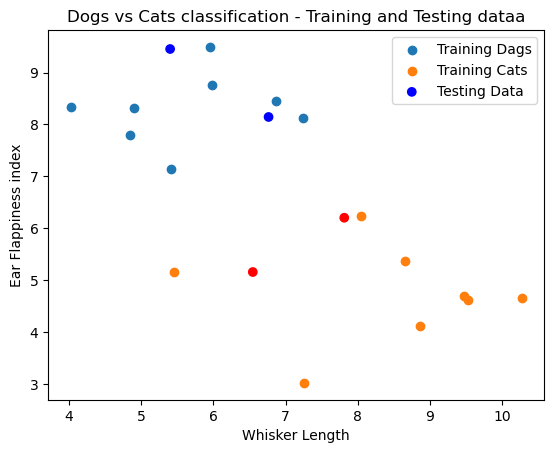

In [329]:
plt.scatter(X_train[Y_train==0][:,0],X_train[Y_train==0][:,1], label='Training Dags')
plt.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],label="Training Cats")
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test,cmap='bwr',label="Testing Data")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness index")
plt.title("Dogs vs Cats classification - Training and Testing dataa")
plt.legend()
plt.show()

In [330]:
print(f"{X_train[Y_train==0][:,0],X_train[Y_train==0][:,1]}")

(array([4.89678115, 4.02272212, 7.2408932 , 5.97873798, 5.4105985 ,
       6.86755799, 4.84864279, 5.95008842]), array([8.3130677 , 8.33367433, 8.12167502, 8.76103773, 7.14590426,
       8.44386323, 7.79484174, 9.49407907]))


In [331]:
print(f"{X_train[Y_train==1][:,0],X_train[Y_train==1][:,1]}")

(array([ 8.6536186 ,  9.53277921,  8.04575852,  7.25783498,  9.46935877,
        8.8644362 ,  5.44701018, 10.26975462]), array([5.37816252, 4.61267318, 6.23029068, 3.01920353, 4.69769725,
       4.11221425, 5.15494743, 4.65208785]))


In [332]:
print(f"{X_test[:,0],X_test[:,1]}")

(array([6.76405235, 7.81281615, 6.54563433, 5.40015721]), array([8.14404357, 6.20237985, 5.15634897, 9.45427351]))


# Random Linear Classifier Algo 
## compute error
### run random linear classifier algorithm on training data

In [333]:
k=350 #number of iterations
#k = best_k


In [334]:
d=2 # number of features

In [335]:
besttheata_train,bestthetha0_train,best_train_error=random_linear_classifier(X_train[Y_train==0],X_train[Y_train==1],k,d)

In [336]:
besttheata_train

array([-1.07075262,  1.05445173])

In [337]:
bestthetha0_train

-0.40317694697317963

In [338]:
best_train_error

0

# Plot the decision boundary on training data

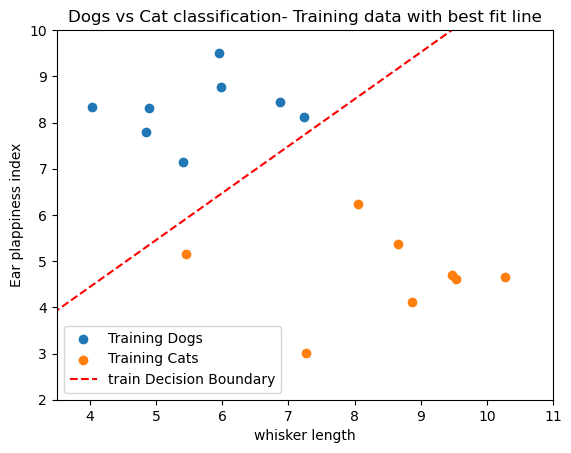

In [339]:
x_vals_train = np.linspace(2,10,100)
y_vals_train =(-besttheata_train[0]/besttheata_train[1]*x_vals_train-bestthetha0_train/besttheata_train[1])
plt.scatter(X_train[Y_train==0][:,0],X_train[Y_train==0][:,1],label="Training Dogs")
plt.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],label="Training Cats")
plt.plot(x_vals_train,y_vals_train,color='red',linestyle='--',label="train Decision Boundary")

#set some limits for c and y axes
plt.xlim([3.5,11])
plt.ylim([2,10])
plt.xlabel("whisker length")
plt.ylabel("Ear plappiness index")
plt.title("Dogs vs Cat classification- Training data with best fit line")
plt.legend()
plt.show()


# print training error

In [340]:
print(f"Training error :{best_train_error}")

Training error :0


# compute test error

In [341]:
test_error = compute_error(X_test[Y_test==0],X_test[Y_test==1],besttheata_train,bestthetha0_train)
print(f"Testing error: {test_error}")

Testing error: 0


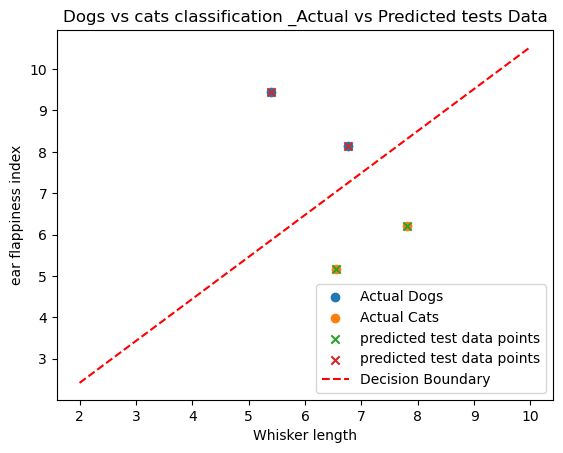

In [342]:
#plot the actual test data and predicted test data
plt.scatter(X_test[Y_test==0][:,0],X_test[Y_test==0][:,1],label="Actual Dogs")
plt.scatter(X_test[Y_test==1][:,0],X_test[Y_test==1][:,1],label="Actual Cats")

#predicted test data points using the decision
predicted_labels=np.zeros_like(Y_test)
for i,x_test in enumerate(X_test):
    if np.dot(besttheata_train,x_test)+bestthetha0_train>0:
        predicted_labels[i]=1
        
#plot predicted test data points
plt.scatter(X_test[predicted_labels==0][:,0],X_test[predicted_labels==0][:,1],marker='x',label='predicted test data points')
plt.scatter(X_test[predicted_labels==1][:,0],X_test[predicted_labels==1][:,1],marker='x',label='predicted test data points')
#plot decision boundary

plt.plot(x_vals_train,y_vals_train,color='red',linestyle='--',label="Decision Boundary")
plt.xlabel("Whisker length")
plt.ylabel("ear flappiness index")
plt.title("Dogs vs cats classification _Actual vs Predicted tests Data")
plt.legend()
plt.show()